## 평균 이동 (Mean Shift)

### 참고 웹페이지
성균관 대학교 수학과 보험계리학 제2장._확률밀도함수는_확률이_아니다.pdf
https://darkpgmr.tistory.com/147#:~:text=%EB%A8%BC%EC%A0%80%2C%20%EC%BB%A4%EB%84%90%ED%95%A8%EC%88%98(kernel%20function,%EC%9D%B4%20%EB%8C%80%ED%91%9C%EC%A0%81%EC%9D%B8%20%EC%BB%A4%EB%84%90%20%ED%95%A8%EC%88%98%EB%93%A4%EC%9D%B4%EB%8B%A4.
https://datascienceschool.net/03%20machine%20learning/16.01%20%EA%B5%B0%EC%A7%91%ED%99%94.html
https://sanghyu.tistory.com/14
https://sanghyu.tistory.com/16?category=1122189
https://jayhey.github.io/novelty%20detection/2017/11/02/Novelty_detection_Gaussian/
https://jayhey.github.io/novelty%20detection/2017/11/03/Novelty_detection_MOG/

### 군집화의 핵심 질문
- 어떻게 데이터들을 특정 군집으로 그룹화 할 수 있는가?
- 평균 이동 (Mean shift)는 그룹화의 기준이 되는 중심점을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동시켜서 그룹화를 시행한다.

    ### 평균 이동에서 "밀도"가 의미하는 바는 무엇인가?
    - 데이터의 분포도를 보았을 때, 거리가 가까운 것들은 밀도가 높다.
    - 밀도라는 것은 구간의 확률을 의미한다.
    - 데이터의 분포도와 구간의 확률을 결합하면, 확률밀도함수를 구현하여 밀도값을 추정할 수 있다.

### 확률밀도함수는 무엇인가?

- 먼저 이산확률변수에 대해 살펴보자. 
- 이산확률변수 X에 대한 확률분포함수는 확률질량함수로 표현한다. 
- 확률질량함수는 이산확률변수 X에 대해 X=x일 사건이 일어날 확률을 대응하는 함수로 정의한다. 
- 주사위의 눈을 확률변수 X로 하는 사건을 시행할 때 X=1일 확률은 1/6이므로 P(X=1)=1/6이고 확률질량함수 f(x)는 사건 X가 발생할 확률을 뜻한다.
- 반면 연속확률변수 X에 대해서는 확률분포함수를 확률밀도함수로 정의한다. X의 확률밀도함수는 정의상 다음과 같다.

![image](20210825_092902.png)

- 즉, 확률밀도함수는 누적분포함수(Cumulative Distribution Function: c.d.f.)의 도함수로 정의한다.
- (S(x)=1-F(x), S(x)는 생존함수이다.) 
- 확률질량함수와 다르게 확률밀도함수는 누적분포함수의 도함수로 정의하는 이유에 대해 생각해보자. 
- 예를 들어, 사람이 컵에 물을 따르는 시행을 한다고 하면 따른 물의 양은 연속확률변수 X이다. 
- 과연 사람이 컵에 정확하게 100ml를 따르는 확률은 몇일까? 이와 같은 시행에서 X=100인 확률은 0이다. 
- 즉,연속확률변수에서는 이산확률변수와 다르게 특정한 점에서의 확률을 정의할 수 없기 때문에 누적분포함수의 도함수로 정의한다. 
- 따라서 확률밀도함수 f(x)는 확률이 아니다. 
- 하지만 특정한 점이 아닌 구간에서는 확률의 의미를 갖는다. 
- 컵에 정확하게 100ml의 물을 따를 확률은 0이지만 90ml~100ml를 따를 확률은 0이 아니다. 
- 이처럼 확률밀도함수는 그 자체로 확률을 의미하지 않고 그 값 주변의 값 (x ± dx)을 취할 가능성을 상대적인 높이로 나타낸다.

![image](20210825_093430.png)
![image](https://t1.daumcdn.net/cfile/tistory/2246C04B54EFD71E39)

#### 확률밀도함수를 통해 얻고자 하는 값은, 임의의 데이터가 특정 구간에 값을 가질 확률을 나타내는 값이다.

### 평균 이동 알고리즘
- K-평균과 유사하게 중심점을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다.
- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다. 이때, 확률 밀도 함수를 이용한다.
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 설정한다.
- 주어진 모델의 확률 밀도 함수를 찾기 위해 Kernel Density Estimation을 이용한다.

#### 즉, 평균 이동은 특정 데이터를 반경 내 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤, 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 말한다.

![image](https://image.slidesharecdn.com/meanshiftarobustapproachtofeaturespaceanalysis-110428055445-phpapp02/95/mean-shift-arobustapproachtofeaturespaceanalysis-24-728.jpg?cb=1303970410)

### 평균 이동 알고리즘 Step by Step

1. 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반의 Mean Shift 알고리즘으로 계산
2. KDE로 계산된 데이터 분포도가 높은 방향으로 데이터를 이동
3. 모든 데이터를 1-2까지 수행하면서 데이터를 이동시켜서 개별 데이터들이 군집중심점으로 모이게 형성한다.
4. 지정된 반복 횟수만큼 전체 데이터에 대해서 KDE 기반으로 데이터를 이동시키면서 군집화를 수행
5. 개별 데이터들이 모인 중심점을 군집 중심점으로 설정

### Parametric 추정 VS Non-parametric 추정

#### Parametric 방법
- 밀도추정(density estimation) 방법은 크게 parametric 방법과 non-parametric 방법으로 구분할 수 있다.
- Parametric 밀도추정은 미리 pdf(probability density function)에 대한 모델을 정해놓고 데이터들로부터 모델의 파라미터만 추정하는 방식이다. 
- 예를 들어, '일일 교통량'이 정규분포를 따른다고 가정해 버리면 관측된 데이터들로부터 평균과 분산만 구하면 되기 때문에 밀도추정 문제가 비교적 간단한 문제가 되어 버린다

#### Non-parametric 방법
- Non-parametric 밀도추정의 가장 간단한 형태가 바로 히스토그램(histogram)이다. 
- 즉, 관측된 데이터들로부터 히스토그램을 구한 후 구해진 히스토그램을 정규화하여 확률밀도함수로 사용하는 것이다.

![image](https://t1.daumcdn.net/cfile/tistory/22480C4A54EFF49103)

#### Kernel Density Estimation (커널 밀도 추정)

- 앞서 non-parametric 밀도추정의 가장 단순한 형태가 히스토그램(histogram) 방법이다.
- 히스토그램 방법은 bin의 경계에서 불연속성이 나타난다는 점 
- bin의 크기 및 시작 위치에 따라서 히스토그램이 달라진다는 점 
- 고차원(high dimension) 데이터에는 메모리 문제 등으로 사용하기 힘들다는 점 등의 문제점을 갖는다.

- Kernel Density Estimation (커널 밀도 추정) 방법은 non-parametric 밀도추정 방법 중 하나로서 커널함수(kernel function)를 이용하여 히스토그램 방법의 문제점을 개선한 방법이다.

![image](https://t1.daumcdn.net/cfile/tistory/271C823C54F00FF520)

- 먼저, 커널함수(kernel function)에 대한 이해가 필요한데 수학적으로 커널함수는 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수로 정의되며 가우시언(Gaussian), Epanechnikov, uniform 함수 등이 대표적인 커널 함수들이다
- 다시 KDE(Kernel Density Estimation, 커널 밀도 추정)로 돌아가서 x를 변수(random variable), x1, x2, ..., xn을 관측된 샘플 데이터, K를 커널 함수라 하자. 이 때 KDE에서는 랜덤 변수 x에 대한 pdf(확률밀도함수)를 다음과 같이 추정한다.

![image](https://t1.daumcdn.net/cfile/tistory/261A943654F0325532)

- 식 (4)에서 h는 커널(kernel) 함수의 bandwidth 파라미터로서 커널이 뽀족한 형태(h가 작은 값)인지 완만한 형태(h가 큰 값)인지를 조절하는 파라미터이다. 
- 수식적으로 보면 어렵지만 이를 직관적으로 이해하면 다음과 같다.

1. 관측된 데이터 각각마다 해당 데이터 값을 중심으로 하는 커널 함수를 생성한다: K(x-xi)

2. 이렇게 만들어진 커널 함수들을 모두 더한 후 전체 데이터 개수로 나눈다.

![image](https://t1.daumcdn.net/cfile/tistory/2359A23E54F02F4B2F)

- 히스토그램을 이용한 밀도추정 방법과 KDE 방법을 비교해 보면, 
- 히스토그램 방법은 이산적(discrete)으로 각 데이터에 대응되는 bin의 값을 증가시킴으로써 불연속성이 발생하는 반면 
- KDE 방법은 각 데이터를 커널 함수로 대치하여 더함으로써 그림 4 오른쪽 그래프와 같이 smooth한 확률밀도함수(pdf)를 얻을 수 있는 장점을 갖는다.
- 즉, KDE(Kernel Density Estimation)를 통해 얻은 확률밀도함수는 히스토그램 확률밀도함수를 스무딩(smoothing)한 것으로도 볼 수 있으며 
- 이 때, 스무딩(smoothing) 정도는 아래 그림처럼 어떤 bandwidth 값의 커널 함수를 사용했으냐에 따라 달라진다.

### Mean Shift의 핵심 하이퍼 파라미터 h
- 하이퍼 파라미터 h가 의미하는 것은 대역폭 (bandwidth)를 의미한다.
- h값은 KDE 형태를 얼마나 부드러운 혹은 뽀족한 형태로 평활화 할 것인지를 결정하는 파라미터이다.
- h값에 따라 확률 밀도 추정의 성능을 조정할 수 있다.
- 작은 h값은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하게 된다. (과적합 하기 쉽다)
- 매우 큰 h값은 과도하게 평활하된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하게 된다. (과소적합 하기 쉽다)
- 적절한 KDE의 대역폭 h를 계산하는 것은 평균 이동 군집화에서 매우 중요하다.

### h값에 따른 군집화의 변화
#### h값이 작다? 
- 확률밀도 함수의 폭이 좁다. 
- 데이터의 거리 추정의 범위가 좁아진다. 
- 데이터의 개별 확률 특성을 고려하여 세부 그룹으로 나눈다. 군집화의 갯수가 늘어난다.

#### h값이 크다? 
- 확률밀도 함수의 폭이 넓다. 
- 데이터의 거리 추정의 범위가 넓어진다. 
- 더 많은 데이터의 특성을 하나로 단순화 하며 군집화. 군집화의 갯수가 줄어든다.

![image](https://spin.atomicobject.com/wp-content/uploads/ms_2d_bw_.8.gif)
![image](https://spin.atomicobject.com/wp-content/uploads/ms_2d_bw_2.gif)

#### 3차원 데이터의 평균 이동 군집화 시각화

![image](https://spin.atomicobject.com/wp-content/uploads/ms_3d_image_animation.gif)

#### 반복 횟수만큼 확률 밀도 추정과 데이터 포인트 이동을 반복한다.
- 데이터 포인트마다 위치가 다르기 때문에, 확률 분포 범위 또한 계속해서 변화한다.
- 업데이트를 통해, 전체 데이터들의 분포는 h값으로 정의된 대역폭을 기준으로 가장 밀도가 높은 주변 중심점으로 모여든다.

![image](https://ailephant.com/wp-content/uploads/2019/10/mean-shift-finding-densest-regions.png)

### 평균 이동 알고리즘의 특징
1. 장점
- 데이터 셋의 형태를 특정 형태로 가정하지 않고, 특정 분포도 기반의 모델로 가정하지 않기 때문에 유연한 군집화가 가능하다.
- 이상치의 영향력이 크지 않다.
- 군집의 개수를 정할 필요가 없다.

2. 단점
- 알고리즘의 수행 시간이 오래 걸린다.
- bandwidth의 크기에 따른 군집화 영향도가 매우 높다.

이러한 특징으로 인해, 컴퓨터 비전 영역의 이미지 & 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행

In [2]:
# 사이킷런 라이브러리를 이용해 평균 이동 알고리즘을 구현해보기

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

mean_shift = MeanShift(bandwidth=0.8)
mean_shift.fit(X)
cluster_labels = mean_shift.predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [4]:
mean_shift = MeanShift(bandwidth=1)
cluster_labels = mean_shift.fit_predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [5]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)

print("bandwidth 값:", np.round(bandwidth, 3))

bandwidth 값: 1.816


In [6]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=["ftr1", "ftr2"])
clusterDF["target"] = y

best_bandwidth = estimate_bandwidth(X)

mean_shift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = mean_shift.fit_predict(X)

print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


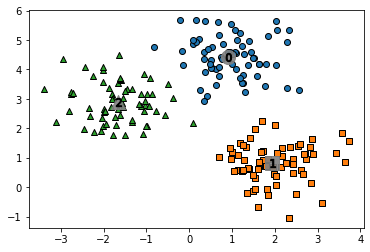

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF["mean_shift_label"] = cluster_labels
centers = mean_shift.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ["o", "s", "^", "x", "*"]

for label in unique_labels:
    label_cluster = clusterDF[clusterDF["mean_shift_label"]==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster["ftr1"], y=label_cluster["ftr2"], edgecolor="k", marker=markers[label])
    # 군집별 중심점 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color="gray", alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color="k", edgecolor="k", marker="$%d$" % label)
plt.show()

In [11]:
clusterDF.groupby("target")["mean_shift_label"].value_counts()

target  mean_shift_label
0       0                   67
1       1                   67
2       2                   66
Name: mean_shift_label, dtype: int64